# WEEK2: Resampling Methods

# Objective

This homework sheet will help reviewing the basic concepts associated with model selection and regularization. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

**Questions**

 This homework is divided into two main parts. First, a conceptual component will review the basic concepts related to resampling. The second part of the homework is mostly intended to be a brief introduction to regularization methods and resampling in python . Several of these questions are modified from James et al. (2021).

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| Q1a    | 1     |
| Q1b    | 0.50      |
| Q1c   | 1      |
| Q1d     | 0.50      |
| Q1e     | 0.50     |
| Q1f    | 0.50    |
| Q2a    | 1     |
| Q2b    | 1      |
| Q2c   | 1      |
| Q2d     | 1      |
| Q3a   | 1    |
| Q3b     | 1      |
| Q4     | 1      |
| Q5a    | 1    |
| Q5b    | 1     |
| Q5c   | 1     |
| Q5d     | 1      |

# Conceptual

##  Q1. We will derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of `n` observations. **Please note that samples are obtained with replacement**.

### a) What is the probability that the first bootstrap observation is not the $jth$ observation from the original sample? Justify your answer.

The probability that the first bootstrap observation is not the $j$th observation from the original sample is $1 - \frac{1}{n}$, where $n$ is the total number of observations in the original sample. This is because each observation in the original sample has an equal probability of $\frac{1}{n}$ of being selected as the first bootstrap observation, and the probability of not selecting the $j$th observation is $1 - \frac{1}{n}$.


### b) What is the probability that the second bootstrap observation is not the $jth$ observation from the original sample?



The probability that the second bootstrap observation is not the $j$th observation from the original sample is also $1 - \frac{1}{n}$, as each bootstrap observation is independently selected with replacement.


###  c) Argue that the probability that the $jth$ observation is not in the bootstrap sample is $(1 − 1/n)^n$.

The probability that the $j$th observation is not in the bootstrap sample after $n$ selections is $(1 - \frac{1}{n})^n$. This can be understood by considering that for each bootstrap observation, the probability of not selecting the $j$th observation is $1 - \frac{1}{n}$. Since selections are made with replacement, the probability remains the same for each draw, and we multiply these probabilities together for all $n$ draws.

###  d) When `n = 5`, what is the probability that the $jth$ observation is in the bootstrap sample?

When $n = 5$, the probability that the $j$th observation is in the bootstrap sample is $1 - (1 - \frac{1}{5})^5 \approx 0.67232$.

### e) When `n = 100`, what is the probability that the $jth$ observation is in the bootstrap sample?

When $n = 100$, the probability that the $j$th observation is in the bootstrap sample is $1 - (1 - \frac{1}{100})^{100} \approx 0.63396765872$.

### f) When `n = 1000`, what is the probability that the $jth$ observation is in the bootstrap sample?


When $n = 1000$, the probability that the $j$th observation is in the bootstrap sample is $1 - (1 - \frac{1}{1000})^{1000} \approx 0.63230457522$.


## Q2)
The following questions are relative to k-fold cross-validation.

### a) Explain how k-fold cross-validation is implemented.


  1. **Split the dataset:** Split the dataset into $k$ equal-sized folds.
   2. **Model training and evaluation:** Iterate through each fold:
      - Use $k-1$ folds for training the model.
      - Use the remaining 1 fold for evaluating the model (validation set).
      - Calculate the evaluation metric (e.g., accuracy, error) for this fold.
   3. **Average the results:** Average the k evaluation metric results to get a single evaluation metric for the model.
   4. **Optional: Repeat the process**: This process can be repeated multiple times with different random splits of the data to reduce the variance of the results.

### b) How would you choose the analyzed k? Does that matter?

 - **Impact of k:** The choice of k can impact the bias-variance tradeoff. Smaller values of k can lead to higher variance but lower bias in the estimated performance. Larger values of k (e.g., k=n, where n is the number of data points) can lead to lower variance but higher bias.
 - **Rule of thumb:** Common choices for k are 5 and 10 as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance. It's also useful to consider computational constraints when choosing k.



### c) What are the advantages and disadvantages of k-fold cross-validation relative to: *The validation set* approach?


#### **Advantages and disadvantages relative to the validation set approach are as follows:**
##### **Advantages:**
 - More efficient use of data: k-fold CV uses all data for training and validation, unlike the validation set approach, which sets aside a portion of the data for validation only.
 - More reliable performance estimation: Since k-fold CV averages the evaluation metric over k folds, it tends to provide a more stable estimate of model performance compared to a single validation set. Validation set error rate in validation set approch may tend to overestimate the test error rate for the model fit on the entire data set. Machine learning methods tend to perform worse when trained on fewer observations and therefore averaging makes error estimate more reliable. 
##### **Disadvantages:**
 - Computationally expensive and more complicated: Performing k iterations of model training and evaluation can be computationally expensive, especially for large datasets or complex models. The validation set approach is more conceptually simple.
 - Variability in results: The choice of k can introduce variability in the estimated performance, and the results can depend on the particular splits of the data.



### d)  What are the advantages and disadvantages of k-fold cross-validation relative to: *LOOCV*?

#### **Advantages and disadvantages relative to LOOCV:**
##### **Advantages:**
 - Low variance: k-fold CV typically has lower variance compared to LOOCV because the estimates from each fold are higly correlated in LOOCV and hence LOOCV has high variance. In simple terms, LOOCV can have higher variance because the models are trained on very similar datasets (differing by only one data point), which can lead to similar errors and hence higher variance in the evaluation metric. 
 - Computational efficiency: For large datasets, k-fold CV is more computationally efficient than LOOCV since it requires training and evaluating the model k times instead of n times (where n is the number of data points).
##### **Disadvantages:**
 - Higher Bias: LOOCV tends to have less bias compared to k-fold CV. This is because each model is trained on nearly all the data, the average performance estimate tends to have lower bias compared to k-fold cross-validation, where each model is trained on a smaller subset of the data.
 - Sensitivity to outliers: LOOCV can be sensitive to outliers since each model is trained on almost all data points, including potentially influential outliers.

# Applied

We have to use college dataset to answer the questions given in the notebook

## Q3)

### a) What is the following code supposed to do?

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define constants
N = 100
ORDER = 2
N_FOLDS = 20
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10

# Set random seed for reproducibility
np.random.seed(123)

# Generate simulated data
x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    indices = [(train_index, test_index) for train_index, test_index in kf.split(data)]
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for train_index, test_index in indices:
            # Fit on K-1 folds
            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            poly = PolynomialFeatures(degree=q)
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)

            # Predict on the kth fold
            x_test = data.iloc[test_index]['x']
            x_test_poly = poly.fit_transform(x_test.values.reshape(-1, 1))
            y_hat[test_index] = lin_reg.predict(x_test_poly)

        # Get the MSE estimate
        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

The above code does the following 
 1. **Data Generation** :Genrate the simulated data for $ Y = X^{2} + \varepsilon $
 2. **Split the data**: The dataset is divided into k equal-sized folds. Here we create 20-fold Cross validation sets, i.e, k = 20
 3. **Evaluate the model**: We evaluvate models having varying polynomial degree from 1 to 10 for cross validation. For each model we do steps 4, 5 and 6. 
 4. **Iterate through folds**: For each fold, a model is trained using the remaining k-1 folds as training data. For example, in the first iteration, the model is trained on folds 2 to k, and in the second iteration, the model is trained on folds 1, 3 to k, and so on., Here k=20
 5. **Average the results**: The evaluation metrics from each fold are averaged to get a single performance metric for the model. Here, the average MSE is found for each polynomial degree model
 6. **Repeat the process**: This process can be repeated multiple times with different random splits of the data to reduce the variance of the results. Here we repeat the process N_REPLICATES times. Here N_REPLICATES=10

 ### b) To the best of your knowledge, improve the structure, content, clarity, and reproducibility of the code presented before in "part a" of this question (e.g. would you run a single or multiple replicates?). Fix any mistakes (if you find any). Finally, generate at least two plots summarizing your findings regarding the best-fitting polynomial order on the simulated dataset (also from "part a"): (1) MSE vs polynomial order, and (2) x vs y, along with a plot of the selected model.

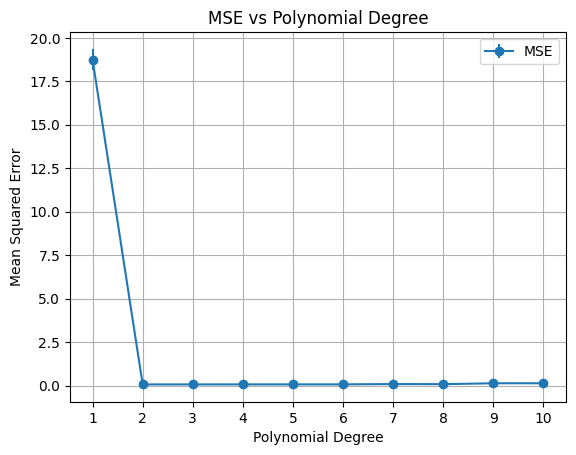

Best Polynomial Degree: 2


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define constants
N = 100
ORDER = 2
N_FOLDS = 5
POLY_DEGREE = np.arange(1, 11)
N_REPLICATES = 10

# Set random seed for reproducibility
np.random.seed(123)

# Generate simulated data
x = np.random.uniform(low=-4, high=4, size=N)
y = np.random.normal(loc=x**ORDER, scale=0.25, size=N)
data = pd.DataFrame({'x': x, 'y': y})

# Initialize an array to store MSE for each fold and each polynomial degree
mse_folds = np.zeros((N_REPLICATES, len(POLY_DEGREE), N_FOLDS))

# Run multiple replicates and average the MSE estimates
mse_estimates = np.zeros((N_REPLICATES, len(POLY_DEGREE)))
for r in range(N_REPLICATES):
    kf = KFold(n_splits=N_FOLDS, shuffle=True)
    for q_idx, q in enumerate(POLY_DEGREE):
        y_hat = np.zeros(N)
        for fold_idx, (train_index, test_index) in enumerate(kf.split(data)):
            # print(train_index)
            # print(test_index)
            x_train, y_train = data.iloc[train_index]['x'], data.iloc[train_index]['y']
            x_test, y_test = data.iloc[test_index]['x'], data.iloc[test_index]['y']

            poly = PolynomialFeatures(degree=q)
            x_train_poly = poly.fit_transform(x_train.values.reshape(-1, 1))
            x_test_poly = poly.transform(x_test.values.reshape(-1, 1))

            lin_reg = LinearRegression()
            lin_reg.fit(x_train_poly, y_train)

            y_hat[test_index] = lin_reg.predict(x_test_poly)
            mse_fold = np.mean((y_hat[test_index] - y_test)**2)
            mse_folds[r, q_idx, fold_idx] = mse_fold
        # print(y_hat)
        mse_estimate = np.mean((y_hat - data['y'])**2)
        mse_estimates[r, q_idx] = mse_estimate

# Average the MSE estimates across replicates
mse_mean = np.mean(mse_estimates, axis=0)
mse_std = np.std(mse_estimates, axis=0)

# Plot MSE vs polynomial order
plt.errorbar(POLY_DEGREE, mse_mean, yerr=mse_std, fmt='o-', label='MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.xticks(POLY_DEGREE)
plt.grid(True)
plt.legend()
plt.show()

# Find the best polynomial order
best_degree_idx = np.argmin(mse_mean)
best_degree = POLY_DEGREE[best_degree_idx]
print(f"Best Polynomial Degree: {best_degree}")


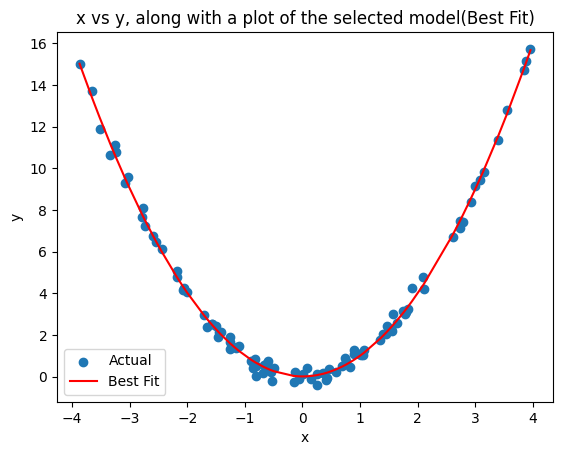

In [3]:
# Plot x vs y with the best-fitting model
plt.scatter(data['x'], data['y'], label='Actual')
poly = PolynomialFeatures(degree=best_degree)
data_sorted = data.sort_values(by='x')
x_poly = poly.fit_transform(data_sorted['x'].values.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(x_poly, data_sorted['y'])
y_pred = lin_reg.predict(x_poly)
plt.plot(data_sorted['x'], y_pred, color='red', label='Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y, along with a plot of the selected model(Best Fit)')
plt.legend()
plt.show()

### Other interesting Graphs 
Other intersting graphs I wanted to plot personally. 

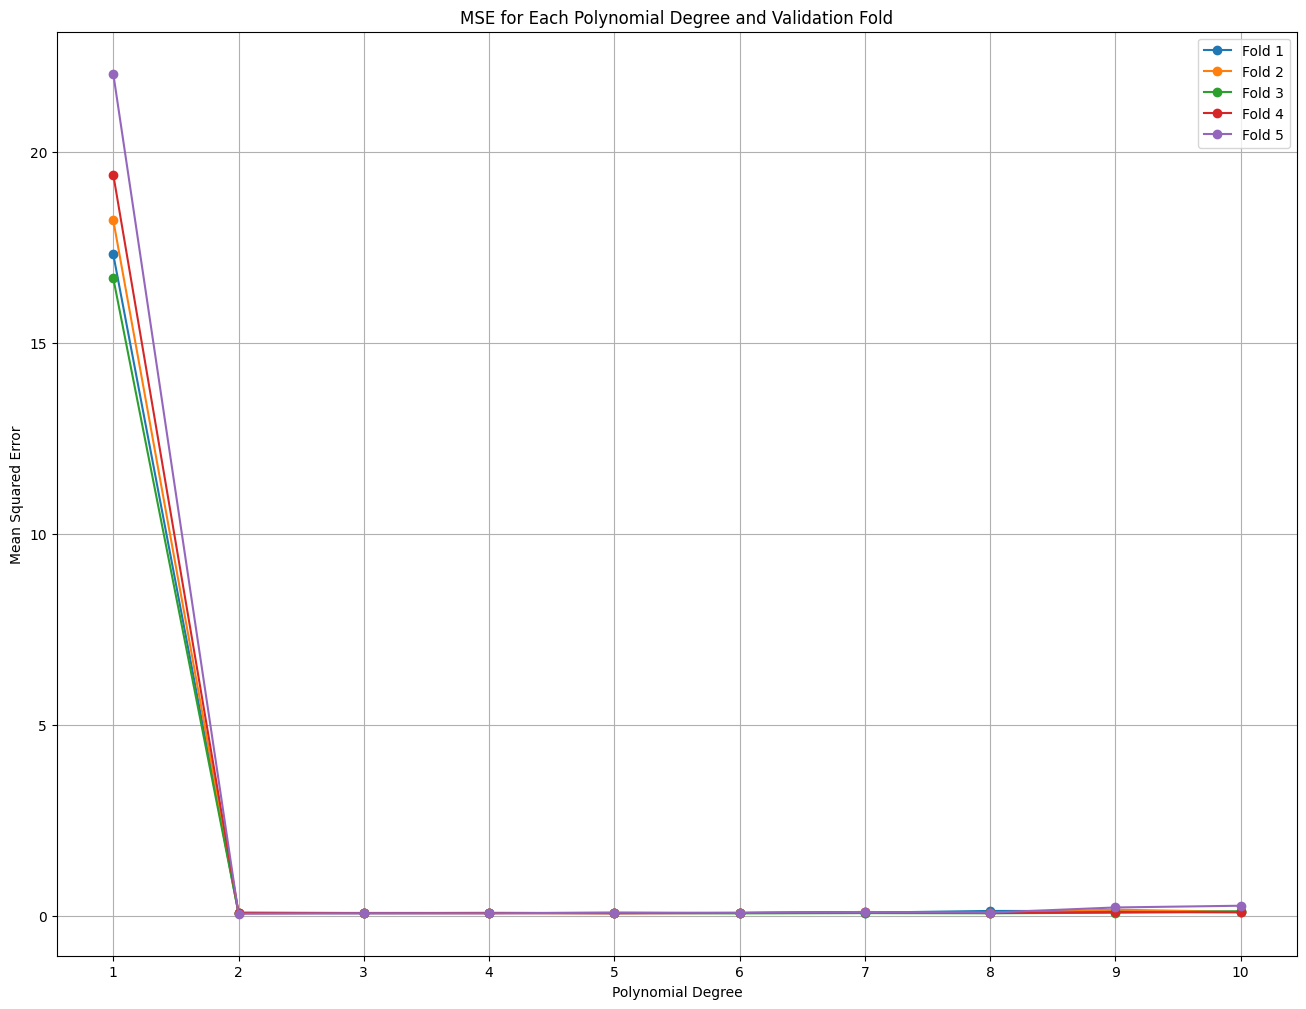

In [4]:
mse_mean_folds = np.mean(mse_folds, axis=0)
plt.figure(figsize=(16, 12))
for fold_idx in range(0, 5):
    plt.plot(POLY_DEGREE, mse_mean_folds[:, fold_idx], marker='o', label=f'Fold {fold_idx + 1}')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Polynomial Degree and Validation Fold')
plt.xticks(POLY_DEGREE)
plt.grid(True)
plt.legend()
plt.show()

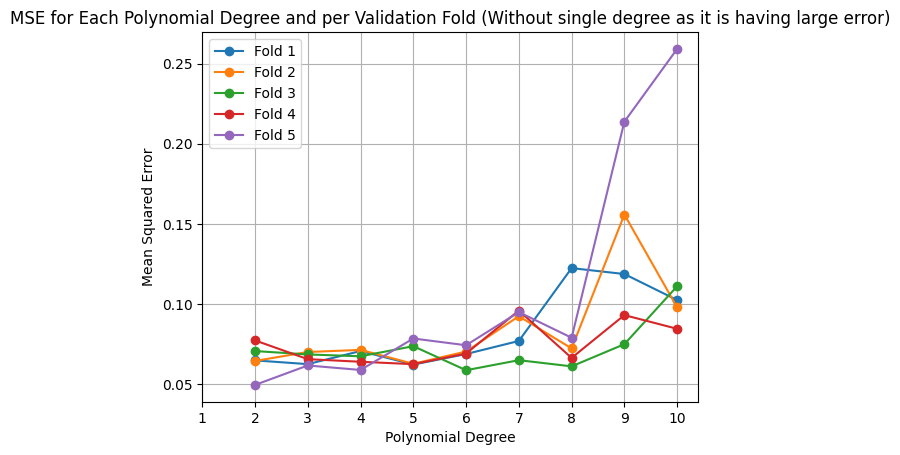

In [5]:
for fold_idx in range(0, 5):
    plt.plot(POLY_DEGREE[1:], mse_mean_folds[:, fold_idx][1:], marker='o', label=f'Fold {fold_idx + 1}')

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Polynomial Degree and per Validation Fold (Without single degree as it is having large error)')
plt.xticks(POLY_DEGREE)
plt.grid(True)
plt.legend()
plt.show()

We can clearly see how the error varation with different folds and how the average seems to increase when model overfits

## Q4) Bootstrap the following dataset (`n = 1000`) to obtain median and 95% CI (Confidence interval)for parameter estimates (slope and intercept) summarizing the relationship between `x` and `y_measured.` What happens with median parameter estimates when you examine `y` instead?

In [6]:
import numpy as np
from numpy.random import default_rng
import scipy.stats as stats
from sklearn.utils import resample

rng = default_rng(seed=1)
nobs = 1000
x = rng.normal(size=nobs)
y = x - 2 * x**2
y_measured = y + rng.normal(size=nobs)

# BEGIN SOLUTION
data_measured = pd.DataFrame({'x': x, 'y': y_measured})
data_no_error = pd.DataFrame({'x': x, 'y': y})

B = 1000
def find_bootstrap_estimate(data, B=1000, confidence=95):
    nobs  = data.shape[0]
    bootstrap_slopes = np.zeros(B, dtype=np.float64)
    bootstrap_intercepts = np.zeros(B, dtype=np.float64)

    mse_estimates = pd.DataFrame({
        "slope_x_square" : np.zeros(B),
        "slope_x" : np.zeros(B),
        "intercept" : np.zeros(B),
        "mse_test": np.zeros(B)
    })
    for i in range(B):
        train_data = resample(data, n_samples=nobs, random_state=i)
        not_included_indices = data.index.difference(train_data.index)
        test_data = data.loc[not_included_indices]
        
        poly = PolynomialFeatures(degree=2)
        x_train_poly = poly.fit_transform(train_data['x'].values.reshape(-1, 1))
        x_test_poly = poly.transform(test_data['x'].values.reshape(-1, 1))

        lin_reg = LinearRegression()
        lin_reg.fit(x_train_poly, train_data['y'])

        y_hat = lin_reg.predict(x_test_poly)
        mse_estimates.loc[i, 'intercept'] = lin_reg.coef_[0]
        mse_estimates.loc[i, 'slope_x'] = lin_reg.coef_[1]
        mse_estimates.loc[i, 'slope_x_square'] = lin_reg.coef_[2]
        mse_estimates.loc[i, 'mse_test'] = np.mean((test_data['y'] - y_hat)**2)
    intercept_ci = np.percentile(mse_estimates["intercept"], [5, 95])
    result = mse_estimates.mean().to_dict()
    alpha = 100-confidence
    for column_name in mse_estimates.columns:
        result[column_name + "_lower_ci"] = np.percentile(mse_estimates[column_name], alpha/2)
        result[column_name + "_upper_ci"] = np.percentile(mse_estimates[column_name], 100-alpha/2)
    return result

def print_result(result):
    labels = {"intercept": "Intercept", "slope_x": "Coefficient for x", "slope_x_square": "Coefficient for x²", "mse_test": "Test MSE"}
    print(f"{B} bootstrapped samples were used to calculate 95% confidence intervals for the following.\n")
    for variable in labels:
        intervel = f"[{result[variable + '_lower_ci']:.4f},{result[variable + '_upper_ci']:.4f}]"
        print(f"Median {labels[variable]} is {result[variable]:.4f} with a 95% a confidence interval of {intervel}.")

result = find_bootstrap_estimate(data_measured, B, 95)
print("\n\nBootstrap Linear Regression using y_measured\n")
print_result(result)
result = find_bootstrap_estimate(data_no_error, 1000, 95)
print("\n\nBootstrap Linear Regression using y (without error)\n")
print_result(result)
# END SOLUTION




Bootstrap Linear Regression using y_measured

1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.

Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
Median Coefficient for x is 1.0426 with a 95% a confidence interval of [0.9790,1.1042].
Median Coefficient for x² is -2.0258 with a 95% a confidence interval of [-2.0709,-1.9817].
Median Test MSE is 1.0629 with a 95% a confidence interval of [0.9445,1.1864].


Bootstrap Linear Regression using y (without error)

1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.

Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
Median Coefficient for x is 1.0000 with a 95% a confidence interval of [1.0000,1.0000].
Median Coefficient for x² is -2.0000 with a 95% a confidence interval of [-2.0000,-2.0000].
Median Test MSE is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].


#### Bootstrap Linear Regression using y_measured

- 1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.
- Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
- Median Coefficient for x is 1.0055 with a 95% a confidence interval of [-0.1988,2.0497].
- Median Coefficient for x² is -1.9943 with a 95% a confidence interval of [-3.0659,-0.8760].
- Median Test MSE is 2.4084 with a 95% a confidence interval of [1.0799,8.7919].


#### Bootstrap Linear Regression using y (without uncertanity or noise/error)

- 1000 bootstrapped samples were used to calculate 95% confidence intervals for the following.
- Median Intercept is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].
- Median Coefficient for x is 1.0000 with a 95% a confidence interval of [1.0000,1.0000].
- Median Coefficient for x² is -2.0000 with a 95% a confidence interval of [-2.0000,-2.0000].
- Median Test MSE is 0.0000 with a 95% a confidence interval of [0.0000,0.0000].

**Observation**: Uncertainty in the data leads to wider confidence intervals, indicating less precision in the estimates.

## Q5) We will predict the number of applications received using the other variables in the **College dataset.** Please load the relevant dataset first.


**Importing Libraries:**

In [7]:
#IMPORT LIBRARIES
import statsmodels.api as sm
import numpy as np
import pandas as pd

**Loading dataset:**

In [8]:
#READ DATA.CSV DATASET
df = pd.read_csv('data.csv')
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
#PERFORM PRE PROCESSING OF DATA IF REQUIRED ( OBSERVE THE DATASET AND ITS VALUES CAREFULLY)
from sklearn.preprocessing import StandardScaler
df['private'] = df['private'].map({'Yes': 1, 'No': 0})
scaler = StandardScaler()
preprocessed_df = df.copy()
numerical_cols = preprocessed_df.select_dtypes(include=['float64', 'int64']).columns
preprocessed_df[numerical_cols] = scaler.fit_transform(preprocessed_df[numerical_cols])
# preprocessed_df

The data is scaled as the Rigde and Lasso are sensitive to scale. Also note that Scaleing makes it easier to compare the importance of each feature by looking at coefficients.  

In [10]:
preprocessed_df

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,0.612553,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,0.612553,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,0.612553,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,0.612553,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,0.612553,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-1.632512,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,0.612553,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,0.612553,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,0.612553,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


In [11]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    float64
 1   apps         777 non-null    float64
 2   accept       777 non-null    float64
 3   enroll       777 non-null    float64
 4   top10perc    777 non-null    float64
 5   top25perc    777 non-null    float64
 6   f_undergrad  777 non-null    float64
 7   p_undergrad  777 non-null    float64
 8   outstate     777 non-null    float64
 9   room_board   777 non-null    float64
 10  books        777 non-null    float64
 11  personal     777 non-null    float64
 12  phd          777 non-null    float64
 13  terminal     777 non-null    float64
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    float64
 16  expend       777 non-null    float64
 17  grad_rate    777 non-null    float64
dtypes: float64(18)
memory usage: 109.4 KB


In [12]:
import seaborn as sns
# sns.pairplot(df)
# plt.show()

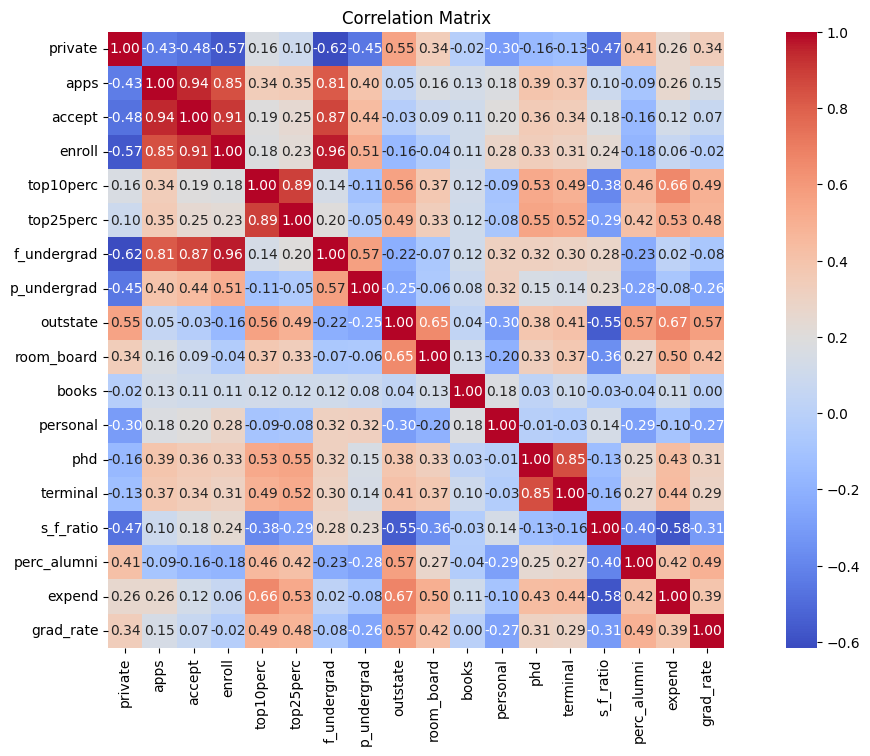

In [13]:
import matplotlib.pyplot as plt
correlation_matrix = preprocessed_df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

### a) Split the data set into a training set and a test set.

In [14]:
# BEGIN SOLUTION
from sklearn.model_selection import train_test_split

# Assuming 'apps' is the target variable and the rest are predictors
X = preprocessed_df.drop('apps', axis=1)
y = preprocessed_df['apps']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
df_train = pd.concat([X_train, y_train], axis=1)
X_train
# END SOLUTION

,private,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
532,0.612553,-0.685356,-0.632120,-0.542206,-0.899183,-0.601553,-0.478687,-0.228998,-0.213073,0.488603,0.705487,-0.592011,-0.999308,1.140173,-0.948325,-0.276171,-1.308544
277,-1.632512,2.206620,2.865701,-0.088409,0.161850,3.089575,0.565053,-0.718996,-1.034248,0.549209,1.055750,0.511089,0.563948,1.291849,-0.060069,-0.237653,-0.026990
333,-1.632512,-0.619221,-0.599813,-1.222902,-1.808640,-0.565451,-0.463569,-0.776203,0.257734,-0.299280,-1.094595,-1.511262,-0.999308,-0.376587,-0.625323,-0.487921,-0.842524
262,0.612553,-0.611873,-0.703197,-0.088409,-0.444454,-0.652303,-0.479344,-0.587169,-0.399206,-0.299280,-0.355645,-0.592011,-0.523535,-0.679939,-1.109826,-0.375051,-1.250292
757,0.612553,-0.446127,-0.439352,0.875911,0.717630,-0.501291,-0.456997,0.552014,0.129995,0.779514,1.601095,0.449806,0.020207,0.710424,-0.221570,-0.255283,0.846798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-1.632512,0.431182,0.193874,-0.315307,0.212376,0.298330,0.444773,-0.645869,-0.481324,-0.602312,-0.122137,-0.040461,-0.387599,0.685145,-0.221570,-0.350331,0.322525
320,-1.632512,0.080095,-0.138893,-0.598931,-0.747607,-0.063934,-0.348548,-0.768244,-0.672931,-1.965956,-1.242385,-1.572545,-1.678985,0.508189,-0.706073,-0.629727,-0.143495
527,0.612553,0.289522,-0.203508,-0.145133,0.313426,-0.284263,-0.389298,2.056829,1.471248,-0.299280,-0.946805,0.878789,0.835818,-0.351308,0.505184,0.992032,0.905050
125,-1.632512,0.457718,0.522333,-0.315307,-0.040251,0.650072,0.226561,-1.074679,-0.818918,0.706786,1.441482,0.020822,-0.115729,0.786262,-0.383071,-0.935951,-0.842524


### b) Fit a linear model using least squares on the training set, and report the test error obtained.
Link to linear model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [15]:
#BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
test_error = mean_squared_error(y_train, y_pred_train)
print("Training error (Mean Squared Error):", test_error)
test_error = mean_squared_error(y_test, y_pred)
print("Test error (Mean Squared Error):", test_error)



# END SOLUTION

Training error (Mean Squared Error): 0.07788254078564955
Test error (Mean Squared Error): 0.04696065732694456


### c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

Link to ridge regresion : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alphas = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]

param_grid = {'alpha': alphas}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
print("Best alpha:", best_alpha)
print("Test error (Mean Squared Error):", test_error)
print("Coefficients", model.coef_)

Best alpha: 6
Test error (Mean Squared Error): 0.04664435827987742
Coefficients [-0.05629734  0.94135324 -0.10346046  0.20984162 -0.05861533  0.03527425
  0.01325524 -0.09544575  0.05132326  0.00407     0.00432863 -0.04489902
 -0.01435865  0.02166068 -0.00663389  0.13332008  0.05217743]


### d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.
 Link to lasso :https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.Lasso.html

In [17]:
#BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alphas = [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]

param_grid = {'alpha': alphas}

lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_error = mean_squared_error(y_test, y_pred)
print("Best alpha:", best_alpha)
print("Test error (Mean Squared Error):", test_error)
non_zero_coefficients = np.sum(model.coef_ != 0)
print("Number of non-zero coefficient estimates:", non_zero_coefficients)
print("Coefficients", model.coef_)
# END SOLUTION

Best alpha: 0.01
Test error (Mean Squared Error): 0.04454538132561103
Number of non-zero coefficient estimates: 10
Coefficients [-0.03586362  0.90105782 -0.          0.13443637 -0.         -0.
  0.         -0.05406847  0.02967211  0.          0.         -0.02481371
 -0.0094784   0.00103572 -0.          0.09877606  0.02616386]
